In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
past = pd.read_csv('PastLoans.csv')
new = pd.read_csv('NewApplications_1_Round1.csv')
past.set_index(['id'], inplace=True)
new.set_index(['id'], inplace=True)

In [4]:
past.columns

Index(['sex', 'married', 'employment', 'income', 'digital1', 'digital2',
       'digital3', 'default'],
      dtype='object')

In [5]:
cat_features = ['sex', 'employment']
pass_features = ['married']
numerical_features = ['income']
numerical_pass_features = ['digital']

cat_encoder = ohe()
numerical_encoder = StandardScaler()

In [6]:
X = past
X[numerical_features] = numerical_encoder.fit_transform(X[numerical_features])
X = pd.get_dummies(X,columns = cat_features, drop_first=True)

In [7]:
X

,married,income,digital1,digital2,digital3,default,sex_M,employment_retired,employment_student,employment_unemployed
id,,,,,,,,,,
1,0,0.171969,0.213,0.193,0.032,0,1,0,0,0
2,0,-0.318407,0.465,0.731,0.472,0,1,0,1,0
3,1,-0.071969,0.147,0.018,0.113,0,1,1,0,0
4,0,-0.399029,0.212,0.346,0.148,0,1,0,1,0
5,1,-0.280512,0.384,0.252,0.551,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
99996,1,-0.332837,0.737,0.692,0.469,0,1,0,1,0
99997,0,-0.427765,0.719,0.752,0.077,0,1,0,1,0
99998,1,-0.132806,0.433,0.361,0.355,0,1,0,0,1


In [8]:
X_val = new
X_val[numerical_features] = numerical_encoder.fit_transform(X_val[numerical_features])
X_val = pd.get_dummies(X_val, columns = cat_features, drop_first=True)

In [9]:
X_val

,married,income,digital1,sex_M,employment_retired,employment_student,employment_unemployed
id,,,,,,,
100001,0,-0.346893,0.491,1,0,1,0
100002,0,-0.026488,0.450,1,0,0,0
100003,0,-0.312824,0.756,1,0,1,0
100004,1,-0.273707,0.618,0,0,0,0
100005,0,-0.055001,0.453,1,0,0,0
...,...,...,...,...,...,...,...
199996,0,-0.253447,0.661,0,0,0,1
199997,0,-0.347107,0.079,0,1,0,0
199998,1,-0.090807,0.185,0,1,0,0


### Explore the correlation between 

<AxesSubplot:>

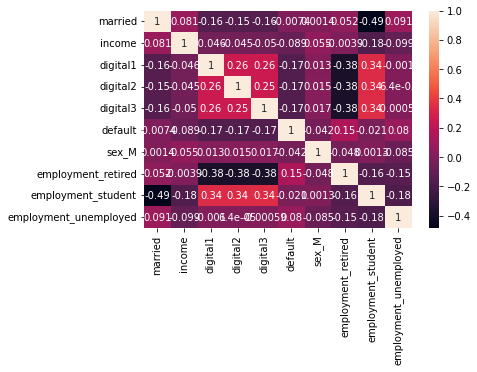

In [10]:
# Correlation Matrix formation
corr_matrix = X.corr()

#Using heatmap to visualize the correlation matrix
sn.heatmap(corr_matrix, annot=True)

In [11]:
def print_reg_coef(past, target):
    """"
    Check the coefficients of the linear regression for each digital feature
    ---
    input:
        past: dataframe
        target: string of feature column
    --- 
    output:
        coefficients of the linear regression with target variable
    """
    y = list(past[target])
    X = past.drop(['default', target], axis=1)
    
    regression = LinearRegression().fit(X, y)

    cdf = pd.DataFrame(regression.coef_, X.columns, columns=['Coefficients'])
    print(cdf)

### Linear regression to analyse the casual inference of the digital features

In [12]:
print_reg_coef(X, 'digital1')

                       Coefficients
married                   -0.000803
income                     0.000666
digital2                   0.037499
digital3                   0.036829
sex_M                     -0.001492
employment_retired        -0.207855
employment_student         0.150386
employment_unemployed      0.000105


In [13]:
print_reg_coef(X, 'digital2')

                       Coefficients
married                    0.000353
income                     0.000856
digital1                   0.037689
digital3                   0.035548
sex_M                     -0.000801
employment_retired        -0.207880
employment_student         0.151032
employment_unemployed      0.000900


In [14]:
print_reg_coef(X, 'digital3')

                       Coefficients
married                    0.000541
income                    -0.000329
digital1                   0.036963
digital2                   0.035499
sex_M                      0.000232
employment_retired        -0.208152
employment_student         0.152980
employment_unemployed      0.000585


### Model the probabilities predictions using regression models

In [15]:
past1 = X.drop(['digital2', 'digital3'], axis=1)
past1.rename(columns={'digital1':'digital'}, inplace=True)
y1 = list(past1['default'])
X1 = past1.drop(['default'], axis=1)

past2 = X.drop(['digital1', 'digital3'], axis=1)
past2.rename(columns={'digital2':'digital'}, inplace=True)
y2 = list(past2['default'])
X2 = past2.drop(['default'], axis=1)

past3 = X.drop(['digital1', 'digital2'], axis=1)
past3.rename(columns={'digital3':'digital'}, inplace=True)
y3 = list(past3['default'])
X3 = past3.drop(['default'], axis=1)

In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [17]:
lr = LinearRegression().fit(X_train1, y_train1)

prediction = lr.predict(X_test1)
mse = mean_squared_error(y_test1, prediction)

rmse = mse**.5
print('Linear Regression MSE:', mse)
print('Linear Regression RMSE:', rmse)

Linear Regression MSE: 0.13743272382920305
Linear Regression RMSE: 0.3707191980855632


In [18]:
logr = LogisticRegression().fit(X_train1, y_train1)

prediction = logr.predict(X_test1)
mse = mean_squared_error(y_test1, prediction)

rmse = mse**.5
print('Logistic Regression MSE:', mse)
print('Logistic Regression RMSE:', rmse)

Logistic Regression MSE: 0.1768
Logistic Regression RMSE: 0.4204759208325728


In [19]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train1, y_train1)

prediction = rf.predict(X_test1)
mse = mean_squared_error(y_test1, prediction)

rmse = mse**.5
print('Random Forrest MSE:', mse)
print('Random Forrest RMSE:', rmse)

Random Forrest MSE: 0.13443910397839345
Random Forrest RMSE: 0.3666593841406401


The best model so far is the random forest. 

In [20]:
new_predict = rf.predict(X_val)


/anaconda3/lib/python3.7/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- digital1
Feature names seen at fit time, yet now missing:
- digital

  warnings.warn(message, FutureWarning)


In [21]:
new_predictions = pd.DataFrame(new_predict, X_val.index)
new_predictions.columns = ['prediction']

In [22]:
new_predictions


,prediction
id,
100001,0.137375
100002,0.119819
100003,0.114911
100004,0.133836
100005,0.121650
...,...
199996,0.166676
199997,0.457915
199998,0.336487


array([[<AxesSubplot:title={'center':'prediction'}>]], dtype=object)

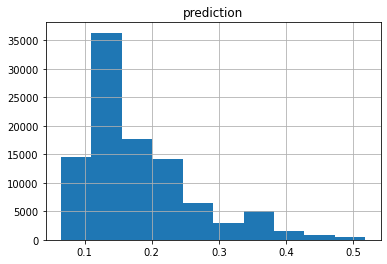

In [24]:
new_predictions.hist(bins=10)

In [25]:
new_predictions.describe()

,prediction
count,100000.000000
mean,0.180926
std,0.082221
min,0.064557
25%,0.124609
50%,0.153714
75%,0.225984
max,0.518280


In [ ]:
new_predictions.to_csv(r'regression_proba.csv', index = False)


### Attempt to get variable explainability with SHAP

In [94]:
!pip install shap

In [100]:
!pip install numba conda update numba

In [97]:
import shap

explainer = shap.TreeExplainer(rf.predict, X_test1)
shap_values = explainer(X_test1)
shap.plots.bar(shap_values)

ModuleNotFoundError: No module named 'numba.core'

### Attempt to select the best model with TPOT

In [87]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached xgboost-1.6.2.tar.gz (790 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.3/436.3 kB 8.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 560.5 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.3/348.3 kB 4.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 419.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import tpot 

# let's try tpot
# define evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search
model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)



In [28]:
# import random 
from random import sample

sampled = pd.DataFrame(np.zeros((100000,)))

# Prints list of random items of given length
list1 = list(range(0,100000)) 
  
sampled.iloc[sample(list1,33333),:] = 1

In [29]:
sampled

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
99995,0.0
99996,0.0
99997,0.0
99998,0.0
